## Importing Libraries


In [72]:
import pandas as pd
import numpy as np                 # mathematical calculation
import seaborn as sns              # for data visualization
import matplotlib.pyplot as plt    # for graphs plotting
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")   # to ignore warnings

## Importing train and test data

In [73]:
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

# copying training data for no data loss

train_original = train.copy()
test_original = test.copy()



In [74]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [75]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

## knowing datatypes of train data

In [76]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [77]:
print(train.shape, test.shape)

(614, 13) (367, 12)


<AxesSubplot:>

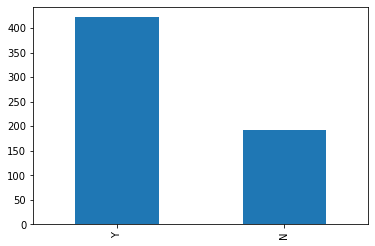

In [78]:
train["Loan_Status"].value_counts().plot.bar()

### For categoral varibale, use barplot, frequency table
### For numerical variables, use density plot for understanding distribution of data

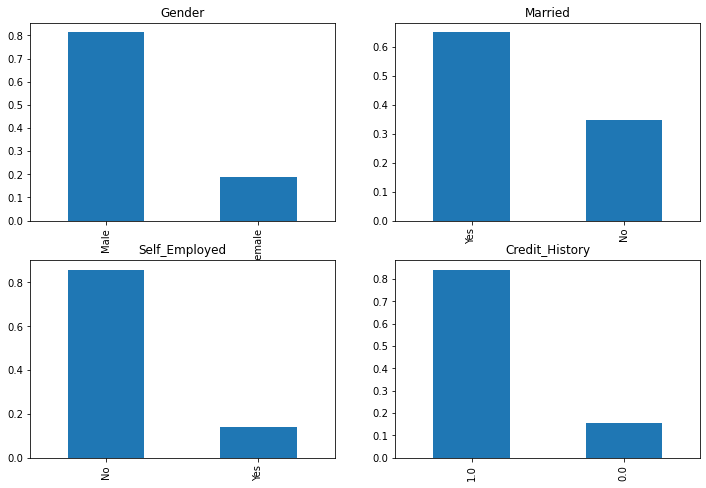

In [79]:
plt.figure(figsize = (12, 8)) 
plt.subplot(221)
train["Gender"].value_counts(normalize=True).plot.bar(title="Gender")

plt.subplot(222)
train["Married"].value_counts(normalize=True).plot.bar(title="Married")

plt.subplot(223)
train["Self_Employed"].value_counts(normalize=True).plot.bar(title= "Self_Employed")

plt.subplot(224)
train["Credit_History"].value_counts(normalize=True).plot.bar(title="Credit_History")

plt.show()


### Analysing Ordinal Features

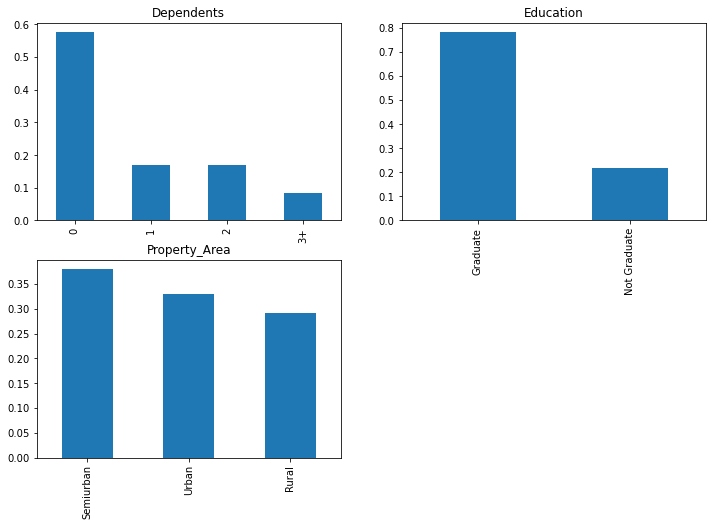

In [80]:
plt.figure(figsize = (12, 8)) 

plt.subplot(221)
train["Dependents"].value_counts(normalize=True).plot.bar(title="Dependents")

plt.subplot(222)
train["Education"].value_counts(normalize=True).plot.bar(title="Education")

plt.subplot(223)
train["Property_Area"].value_counts(normalize=True).plot.bar(title= "Property_Area")

plt.show()


### Analysing Independent Numerical Data

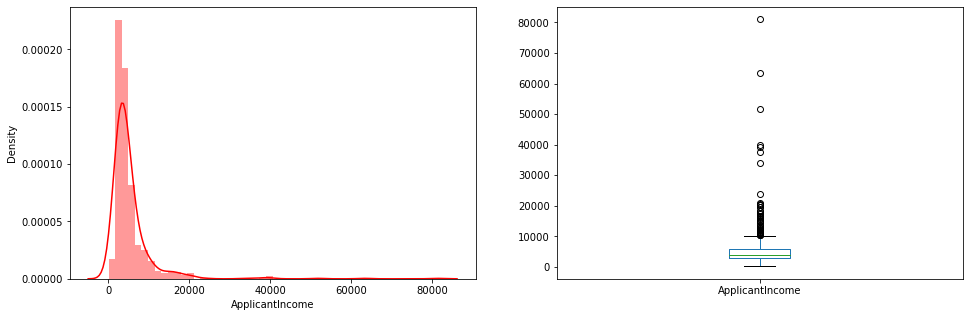

In [81]:
# Plotting Income of the Applicant
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['ApplicantIncome'], color="r");

plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()



Text(0.5, 0.98, '')

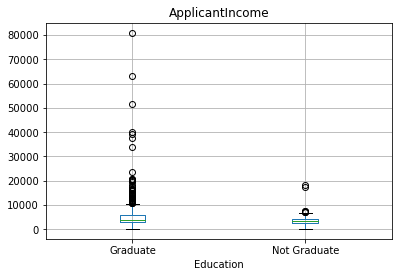

In [82]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")



### Co-Apllicant's Income plot


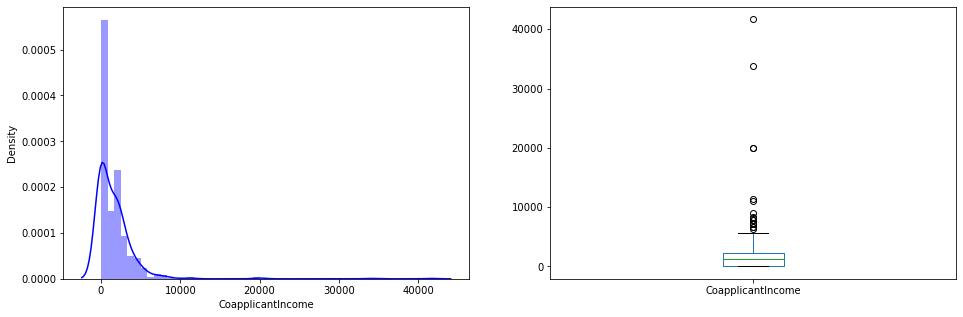

In [83]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train["CoapplicantIncome"], color = "b");

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

### Loan Amount variable Distribution

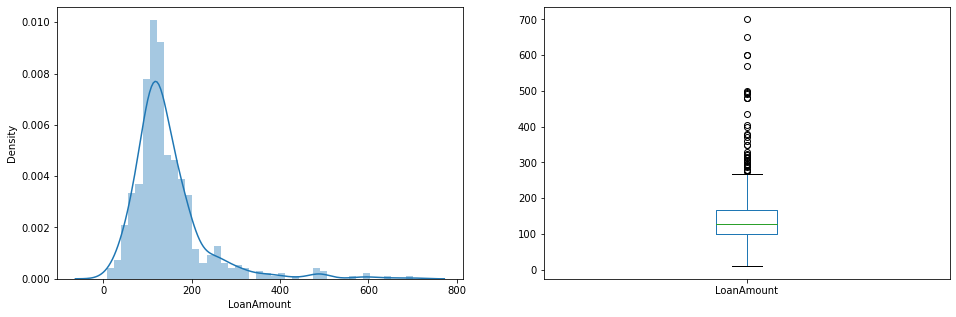

In [84]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(train["LoanAmount"]);

plt.subplot(122)
train["LoanAmount"].plot.box(figsize=(16,5))
plt.show()

### Removing outliers in data
#### Our Hypothesis so far
##### High income = more chances of approval
##### previous loan repayed = more chances of approval
##### less loan amount = more chances of approval
##### less monthly EMI = more chances of approval

<AxesSubplot:xlabel='Gender'>

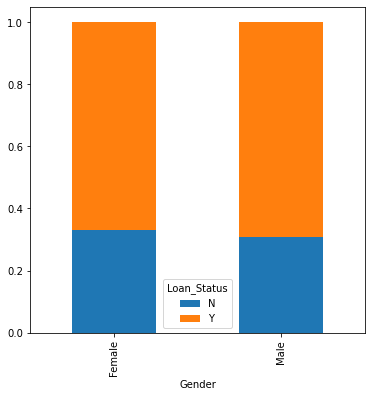

In [85]:
Gender = pd.crosstab(train["Gender"], train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))


<AxesSubplot:xlabel='Dependents'>

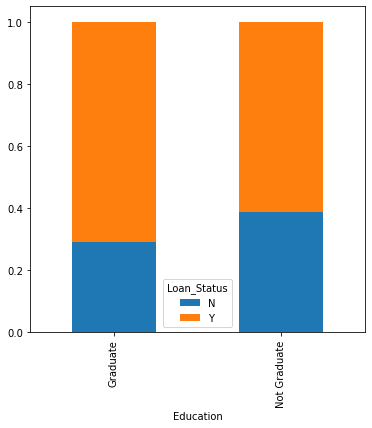

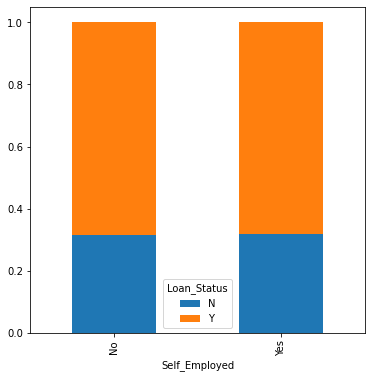

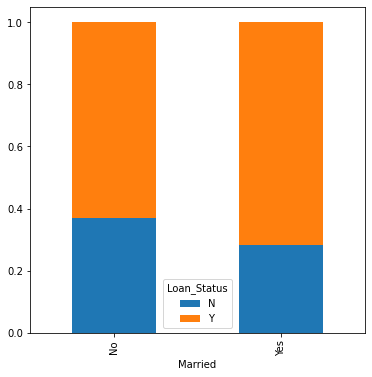

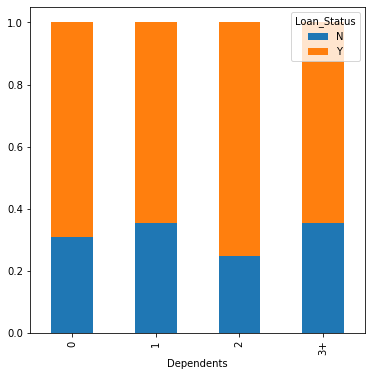

In [86]:
Married = pd.crosstab(train["Married"], train["Loan_Status"])
Dependents = pd.crosstab(train["Dependents"], train["Loan_Status"])
Education = pd.crosstab(train["Education"], train["Loan_Status"])
Self_Employed = pd.crosstab(train["Self_Employed"], train["Loan_Status"])

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))

### Credit Histiry and Propert_Area

<AxesSubplot:xlabel='Property_Area'>

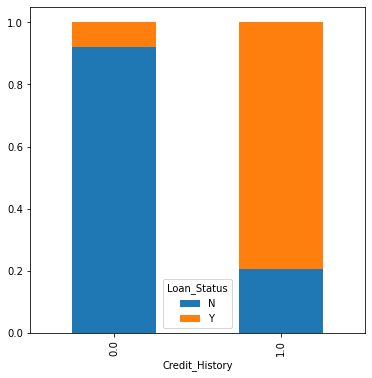

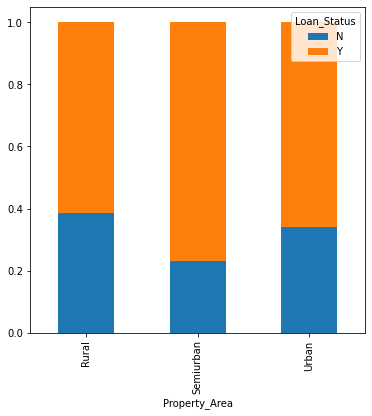

In [87]:
Credit_History = pd.crosstab(train["Credit_History"], train["Loan_Status"])
Property_Area = pd.crosstab(train["Property_Area"], train["Loan_Status"])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))


### Plot of mean income lo loan approved candidates and non-approved candidates

<AxesSubplot:xlabel='Loan_Status'>

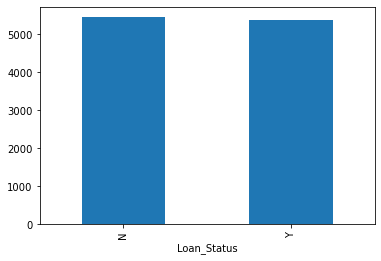

In [88]:
## credit history if 1, more chances of loan approval
## semi_urban have more chances, compared to rural and Urban
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

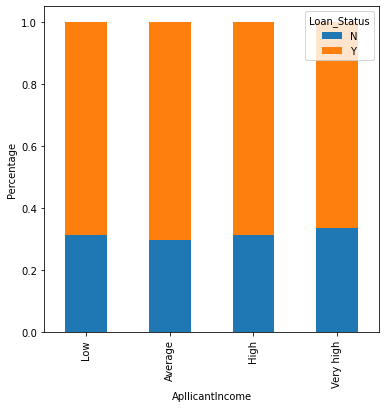

In [89]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', "Average", "High", "Very high"]
train['Income_bin'] = pd.cut(train["ApplicantIncome"], bins, labels=group)

Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))
plt.xlabel('ApllicantIncome')
P = plt.ylabel('Percentage')

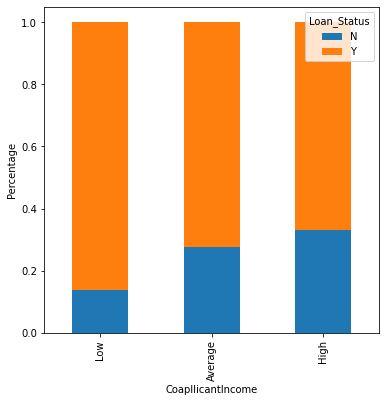

In [90]:
bins = [0, 1000, 3000, 42000]
group = ['Low', "Average", "High"]
train['Coapplicant_Income_bin'] = pd.cut(train["CoapplicantIncome"], bins, labels=group)

Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))
plt.xlabel('CoapllicantIncome')
P = plt.ylabel('Percentage')

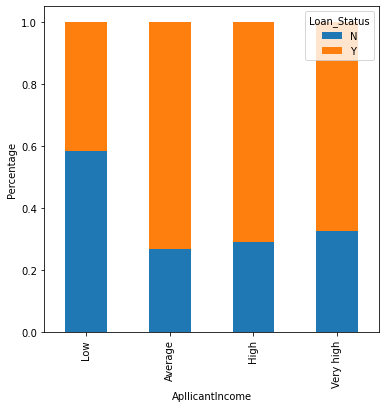

In [91]:
train['Total_Income'] = train["ApplicantIncome"] + train["CoapplicantIncome"]
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', "Average", "High", "Very high"]
train['Total_Income_bin'] = pd.cut(train["Total_Income"], bins, labels=group)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))
plt.xlabel('ApllicantIncome')
P = plt.ylabel('Percentage')

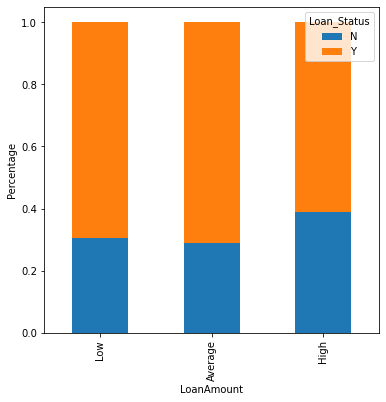

In [92]:
bins = [0, 100, 200, 700]
group = ['Low', "Average", "High"]

train['LoanAmount_bin'] = pd.cut(train["LoanAmount"], bins, labels=group)

LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [93]:
train['Dependents'].replace("3+", 3, inplace=True)
test['Dependents'].replace("3+", 3, inplace=True)

train['Loan_Status'].replace("N", 0, inplace=True)
train['Loan_Status'].replace("Y", 1, inplace=True)

<AxesSubplot:>

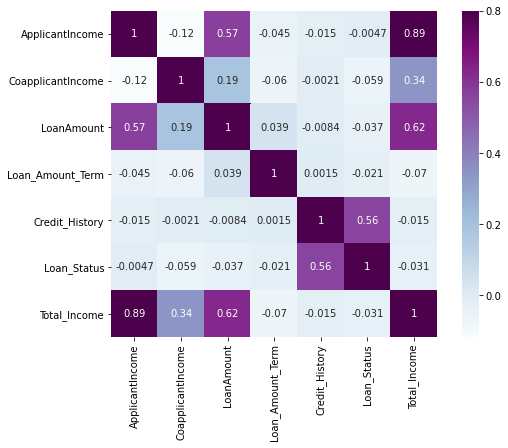

In [94]:
## heatmap for understanding correlation
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, annot=True,vmax = .8, square=True, cmap="BuPu")

### Treating Outliers and Missing values in data

In [95]:
train.isnull().sum()

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
LoanAmount_bin             22
dtype: int64

In [96]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [97]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [98]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [99]:
train['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [100]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [101]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

In [102]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(), inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

### Treating outliers in data


In [103]:
# Mean is the accurate measure to describe the data when we do not have any outliers present.

# Median is used if there is an outlier in the dataset.

# Mode is used if there is an outlier AND about ½ or more of the data is the same.

# Below are some of the methods of treating the outliers

# 1.Trimming/removing the outlier
# 2.Quantile based flooring and capping
# 3.Mean/Median imputation

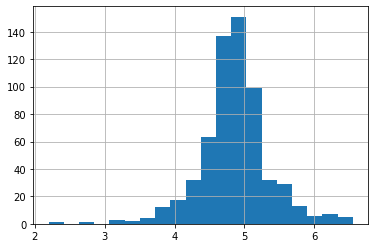

In [104]:
## Log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

test['LoanAmount_log'] = np.log(test['LoanAmount'])



## Building Model

In [105]:

# train = train.drop('Loan_ID', axis=1)
# test = test.drop('Loan_ID', axis=1)
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Coapplicant_Income_bin_Low,Coapplicant_Income_bin_Average,Coapplicant_Income_bin_High,Total_Income_bin_Low,Total_Income_bin_Average,Total_Income_bin_High,Total_Income_bin_Very high,LoanAmount_bin_Low,LoanAmount_bin_Average,LoanAmount_bin_High
0,5849,0.0,128.0,360.0,1.0,5849.0,4.852030,0,1,1,...,0,0,0,0,0,1,0,0,0,0
1,4583,1508.0,128.0,360.0,1.0,6091.0,4.852030,0,1,0,...,0,1,0,0,0,0,1,0,1,0
2,3000,0.0,66.0,360.0,1.0,3000.0,4.189655,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,2583,2358.0,120.0,360.0,1.0,4941.0,4.787492,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,6000,0.0,141.0,360.0,1.0,6000.0,4.948760,0,1,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,2900.0,4.262680,1,0,1,...,0,0,0,0,1,0,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,4106.0,3.688879,0,1,0,...,0,0,0,0,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,8312.0,5.533389,0,1,0,...,1,0,0,0,0,0,1,0,0,1
612,7583,0.0,187.0,360.0,1.0,7583.0,5.231109,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [116]:
# X = train.drop("Loan_Status", 1)
# y = train.Loan_Status


In [117]:
X = pd.get_dummies(X)
train = pd.get_dummies(X)
test = pd.get_dummies(test)


## Training and Validating Model 

In [118]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3)


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                  intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                  penalty='12', random_state=1,
                  solver='liblinear', tol=0.0001, verbose=0, warm_start=False)



LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear')

In [119]:
pred_cv = model.predict(x_cv)


In [120]:
def compute_accuracy(Y_true, Y_pred):  
    correctly_predicted = 0  
    # iterating over every label and checking it with the true sample  
    for true_label, predicted in zip(Y_true, Y_pred):  
        if true_label == predicted:  
            correctly_predicted += 1  
    # computing the accuracy score  
    accuracy_score = correctly_predicted / len(Y_true)  
    return accuracy_score  

print(compute_accuracy(y_cv, pred_cv))


0.7351351351351352


In [121]:
pred_test = model.predict(test)

ValueError: X has 388 features per sample; expecting 650

In [122]:
submission = pd.read_csv("sample_submission_49d68Cx.csv")

In [123]:
submission['Loan_Status'] = pred_test
submission['Load_ID'] = test_original["Loan_ID"]

submission['Loan_Status'].replace(0, "N", inplace=True)
submission['Loan_Status'].replace(1, "Y", inplace=True)


pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logistic.csv')


ValueError: Length of values (122) does not match length of index (367)

In [63]:
from sklearn.model_selection import StratifiedKFold


In [65]:
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))

xtr, xvl = X.iloc[train_index], X.iloc[test_index]
ytr, yvl = y.iloc[train_index], y.iloc[test_index]

model = LogisticRegression(random_state = 1)
model.fit(xtr, ytr)

pred_test = model.predict(xvl)
score = accuracy_score(yvl, pred_test)

print('accuracy_score', score)
i += 1
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:, -1]



1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.7786885245901639


ValueError: X has 21 features per sample; expecting 36